In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


df = pd.read_csv('/Users/chaotzuchieh/Desktop/CAP5771_Project/Data/global_data_on_sustainable_energy.csv')






In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [3]:
#Focus on G20
g20_countries = [
    "Argentina",
    "Australia",
    "Brazil",
    "Canada",
    "China",
    "France",
    "Germany",
    "India",
    "Indonesia",
    "Italy",
    "Japan",
    "Mexico",
    "Russia",
    "Saudi Arabia",
    "South Africa",
    "South Korea",
    "Turkey",
    "United Kingdom",
    "United States"
]

In [4]:
# Rename 'Entity' column to 'Country / Density

df = df.rename(columns={'Entity': 'Country'})
df.rename(columns={r'Density\n(P/Km2)': 'Density(Square kilometre)'}, inplace=True)

In [5]:
#Convert to numeric
df['Density(Square kilometre)'] = pd.to_numeric(df['Density(Square kilometre)'], errors='coerce')

In [6]:
# Check if all G20 countries are in the dataset
#(With the exception of South Korea and Russia/There are no data)
g20_missing = [country for country in g20_countries if country not in df['Country'].values]

print("\n Missing G20 country:")

if g20_missing:
    print("There are missing G20 countries in the dataset")
    print(g20_missing)
else:
    print("There are no missing G20 countries in the dataset")



 Missing G20 country:
There are missing G20 countries in the dataset
['Russia', 'South Korea']


In [7]:
# Filter for countries of interest
df = df[df['Country'].isin(g20_countries)]

In [8]:
# No Russia and South Korea
unique_countries = df['Country'].unique()
print(unique_countries)

['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany'
 'India' 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Saudi Arabia'
 'South Africa' 'Turkey' 'United Kingdom' 'United States']


In [9]:
df.head()

,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(Square kilometre),Land Area(Km2),Latitude,Longitude
105,Argentina,2000,95.783290,95.00,235.62,NaN,9.85,50.37,5.99,28.89,...,18849.810,3.69,132270.0000,12.283858,-0.788999,7708.099115,17.0,2780400.0,-38.416097,-63.616672
106,Argentina,2001,95.511060,95.60,234.09,3890000.0,11.51,42.91,6.54,37.04,...,18210.120,3.59,125260.0000,15.937488,-4.408840,7208.373114,17.0,2780400.0,-38.416097,-63.616672
107,Argentina,2002,96.228870,96.10,236.78,NaN,11.62,39.70,5.39,36.06,...,17275.256,3.99,117470.0012,16.249306,-10.894485,2593.404563,17.0,2780400.0,-38.416097,-63.616672
108,Argentina,2003,96.442635,96.45,234.82,50000.0,10.82,46.73,7.03,34.38,...,18326.521,3.97,127660.0037,14.408259,8.837041,3349.806300,17.0,2780400.0,-38.416097,-63.616672
109,Argentina,2004,96.653500,97.20,236.15,40960000.0,9.29,57.35,7.31,31.03,...,19261.457,4.04,141380.0049,12.185576,9.029573,4277.721573,17.0,2780400.0,-38.416097,-63.616672


In [10]:
df.shape

(357, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 105 to 3522
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           357 non-null    object 
 1   Year                                                              357 non-null    int64  
 2   Access to electricity (% of population)                           357 non-null    float64
 3   Access to clean fuels for cooking                                 357 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              189 non-null    float64
 5   Financial flows to developing countries (US $)                    155 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  340 non-null    float64
 7   Electricity from fossil fuels (TWh)  

In [12]:
df.nunique()

Country                                                              17
Year                                                                 21
Access to electricity (% of population)                             137
Access to clean fuels for cooking                                   142
Renewable-electricity-generating-capacity-per-capita                179
Financial flows to developing countries (US $)                      155
Renewable energy share in the total final energy consumption (%)    295
Electricity from fossil fuels (TWh)                                 357
Electricity from nuclear (TWh)                                      250
Electricity from renewables (TWh)                                   341
Low-carbon electricity (% electricity)                              347
Primary energy consumption per capita (kWh/person)                  357
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         247
Value_co2_emissions_kt_by_country                               

In [13]:
df.isnull().sum()

Country                                                               0
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                168
Financial flows to developing countries (US $)                      202
Renewable energy share in the total final energy consumption (%)     17
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                       42
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          17
Value_co2_emissions_kt_by_country                               

In [14]:
df.columns

Index(['Country', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density(Square kilometre)', 'Land Area(Km2)',
       'Latitude', 'Longitude'],
      dtype='object')

In [15]:
#

df = df.drop(columns=['Renewable-electricity-generating-capacity-per-capita',
                      'Financial flows to developing countries (US $)',
                      'Renewable energy share in the total final energy consumption (%)',
                      'Electricity from nuclear (TWh)',
                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                      'Value_co2_emissions_kt_by_country',
                     ],
             errors='ignore')


In [16]:
df.head()

,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(Square kilometre),Land Area(Km2),Latitude,Longitude
105,Argentina,2000,95.783290,95.00,50.37,28.89,40.914955,18849.810,12.283858,-0.788999,7708.099115,17.0,2780400.0,-38.416097,-63.616672
106,Argentina,2001,95.511060,95.60,42.91,37.04,50.387330,18210.120,15.937488,-4.408840,7208.373114,17.0,2780400.0,-38.416097,-63.616672
107,Argentina,2002,96.228870,96.10,39.70,36.06,51.078250,17275.256,16.249306,-10.894485,2593.404563,17.0,2780400.0,-38.416097,-63.616672
108,Argentina,2003,96.442635,96.45,46.73,34.38,46.982075,18326.521,14.408259,8.837041,3349.806300,17.0,2780400.0,-38.416097,-63.616672
109,Argentina,2004,96.653500,97.20,57.35,31.03,40.066883,19261.457,12.185576,9.029573,4277.721573,17.0,2780400.0,-38.416097,-63.616672


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 105 to 3522
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Country                                             357 non-null    object 
 1   Year                                                357 non-null    int64  
 2   Access to electricity (% of population)             357 non-null    float64
 3   Access to clean fuels for cooking                   357 non-null    float64
 4   Electricity from fossil fuels (TWh)                 357 non-null    float64
 5   Electricity from renewables (TWh)                   357 non-null    float64
 6   Low-carbon electricity (% electricity)              357 non-null    float64
 7   Primary energy consumption per capita (kWh/person)  357 non-null    float64
 8   Renewables (% equivalent primary energy)            357 non-null    float64
 9   g

In [40]:
df.to_csv('New_global_data_on_sustainable_energy.csv', index=False)

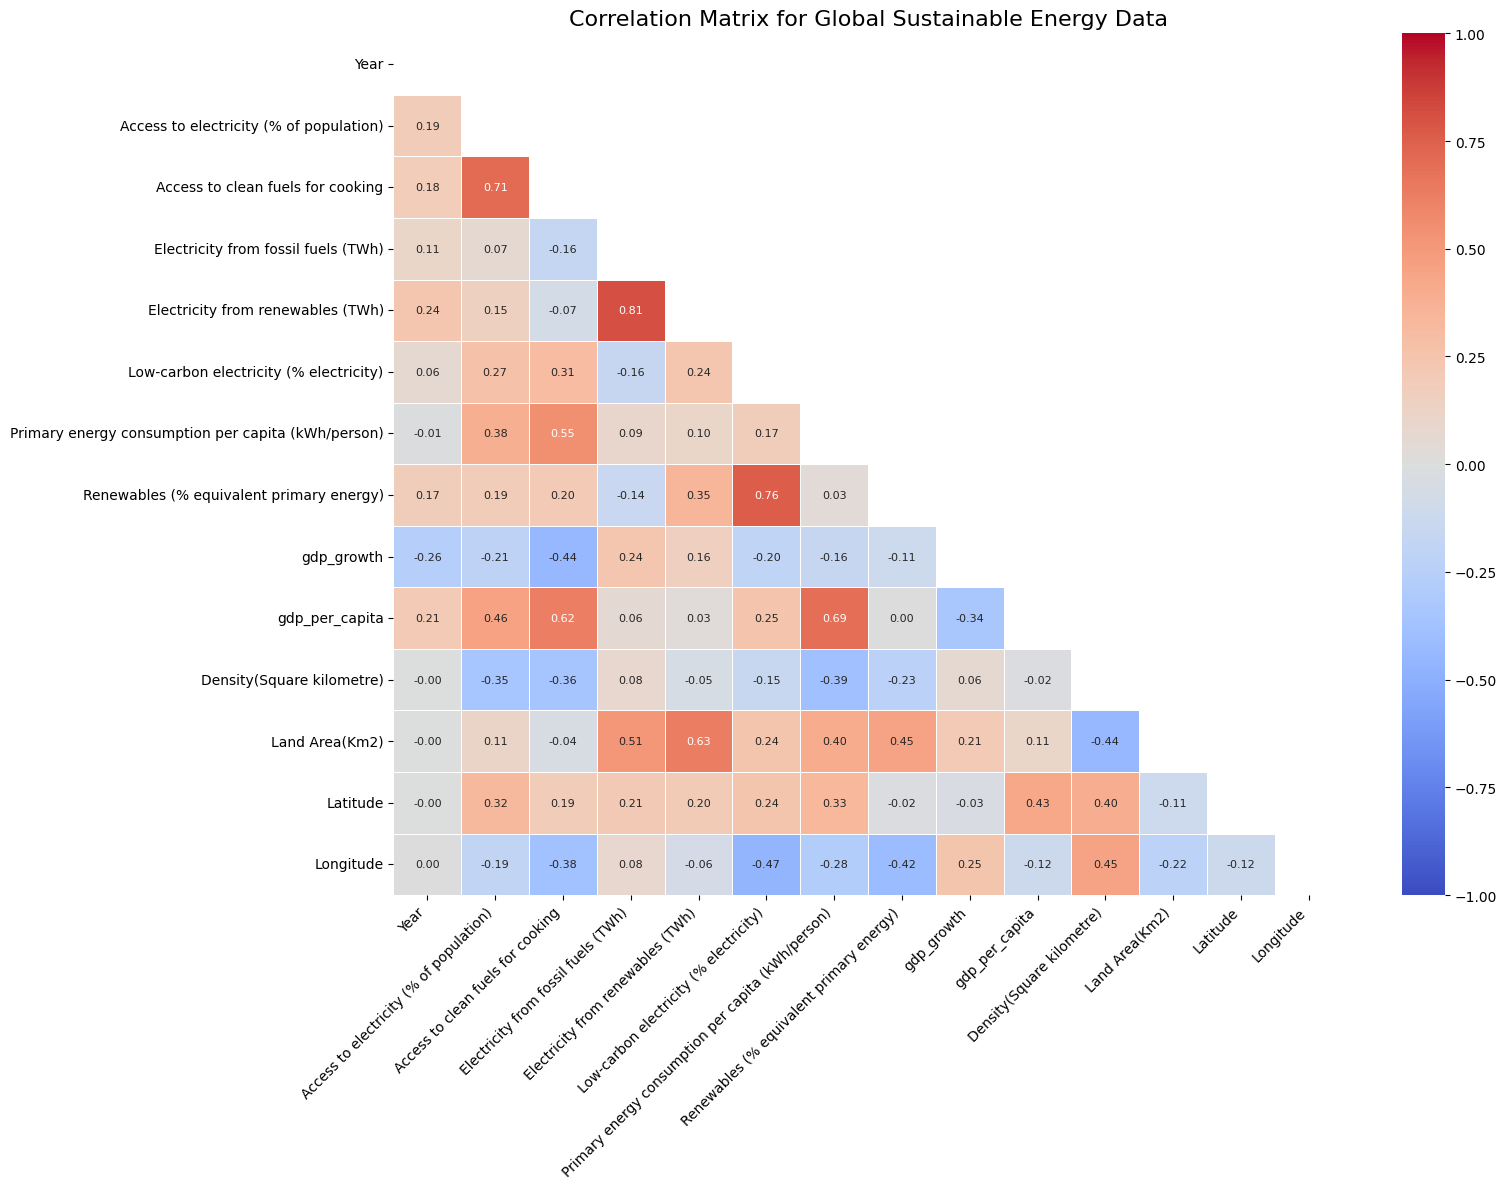

In [19]:
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            annot_kws={"size": 8})

plt.title('Correlation Matrix for Global Sustainable Energy Data', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

/var/folders/fr/3mrt6ds95qs6fhffppltrr3w0000gn/T/ipykernel_36793/3499360426.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_analysis = df.groupby(['Latitude_Band', 'Year']).agg({


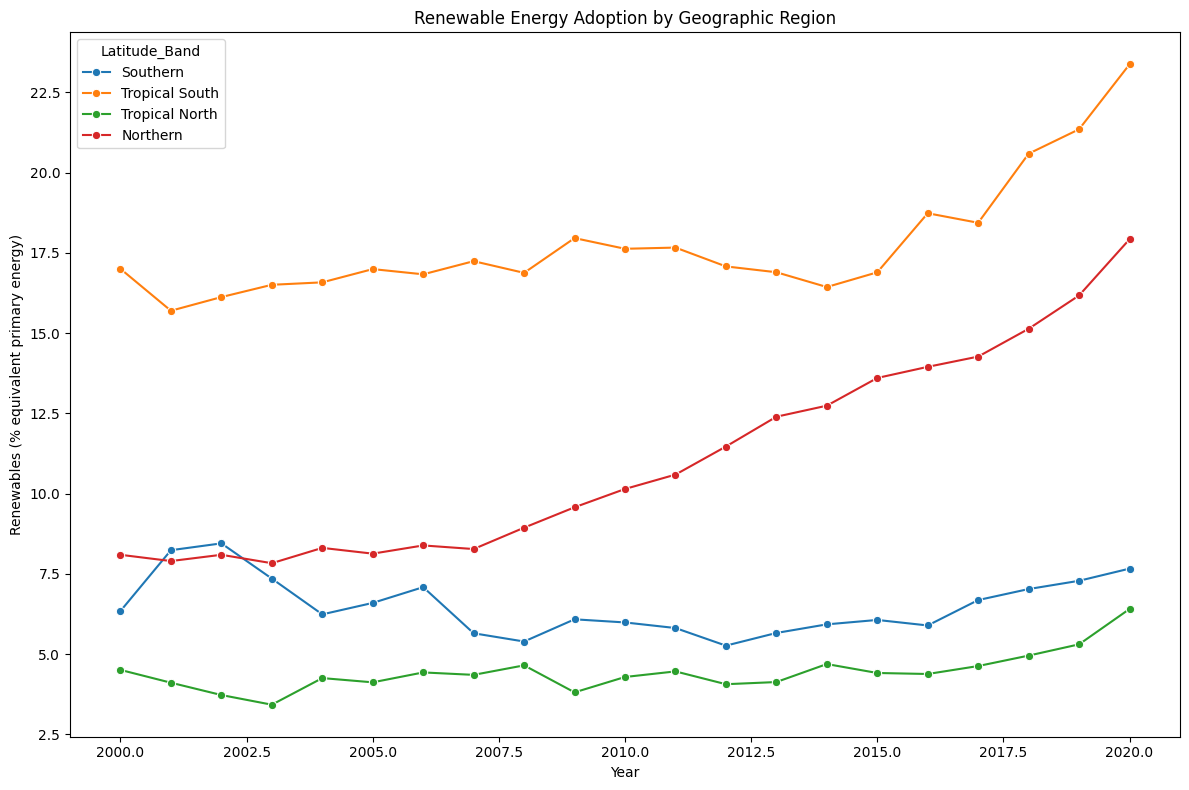

In [20]:

# Regional analysis
# Group countries by latitude bands
df['Latitude_Band'] = pd.cut(df['Latitude'],
                            bins=[-90, -30, 0, 30, 90],
                            labels=['Southern', 'Tropical South','Tropical North', 'Northern'])

regional_analysis = df.groupby(['Latitude_Band', 'Year']).agg({
    'Access to electricity (% of population)': 'mean',
    'Access to clean fuels for cooking': 'mean',
    'Low-carbon electricity (% electricity)': 'mean',
    'Renewables (% equivalent primary energy)': 'mean',
    'gdp_per_capita': 'mean'
}).reset_index()

# Plot regional renewable energy adoption over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=regional_analysis,
             x='Year',
             y='Renewables (% equivalent primary energy)',
             hue='Latitude_Band',
             marker='o')
plt.title('Renewable Energy Adoption by Geographic Region')
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.tight_layout()
plt.show()



#Renewables (% equivalent primary energy): Equivalent primary energy that is derived from renewable sources.

#Higher values may indicate:

#1.Higher levels of industrialization

#2.Generally, climatic conditions that demand more energy (such as very cold or hot areas)

#3.Higher standard of living, using more energy-intensive products and services

#4.Energy efficiency may be low


In [21]:

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')

def country_comparison():
    # 1. Compare renewable energy percentages across countries (latest year)
    latest_year = df['Year'].max()
    latest_data = df[df['Year'] == latest_year].copy()

    # Sort by renewable percentage for better visualization
    latest_data = latest_data.sort_values('Renewables (% equivalent primary energy)', ascending=False)

    plt.figure(figsize=(14, 8))
    bars = plt.bar(latest_data['Country'], latest_data['Renewables (% equivalent primary energy)'])

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height:.1f}%',
                 ha='center', va='bottom', fontweight='bold')

    plt.title(f'Comparison of Renewable Energy Percentage by Country ({latest_year})', fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Renewable Energy Percentage (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(latest_data['Renewables (% equivalent primary energy)']) * 1.1)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

    # 2. Renewable energy growth comparison (between first and last year)
    first_year = df['Year'].min()

    # Create a dataframe showing the change
    countries = df['Country'].unique()
    growth_data = []

    for country in countries:
        first_value = df[(df['Country'] == country) & (df['Year'] == first_year)]['Renewables (% equivalent primary energy)'].values
        last_value = df[(df['Country'] == country) & (df['Year'] == latest_year)]['Renewables (% equivalent primary energy)'].values

        if len(first_value) > 0 and len(last_value) > 0:
            growth = last_value[0] - first_value[0]
            percent_growth = (growth / first_value[0]) * 100 if first_value[0] > 0 else np.inf
            growth_data.append({
                'Country': country,
                'First Year Value': first_value[0],
                'Latest Year Value': last_value[0],
                'Absolute Growth': growth,
                'Percentage Growth': percent_growth
            })

    growth_df = pd.DataFrame(growth_data)
    growth_df = growth_df.sort_values('Absolute Growth', ascending=False)

    # Plot absolute growth
    plt.figure(figsize=(14, 8))
    bars = plt.bar(growth_df['Country'], growth_df['Absolute Growth'])

    # Color bars by growth (green for positive, red for negative)
    for i, bar in enumerate(bars):
        bar.set_color('green' if growth_df['Absolute Growth'].iloc[i] >= 0 else 'red')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.,
                 height + 0.5 if height >= 0 else height - 1.5,
                 f'{height:.1f}%',
                 ha='center', va='bottom' if height >= 0 else 'top',
                 fontweight='bold')

    plt.title(f'Renewable Energy Growth by Country ({first_year}-{latest_year})', fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Renewable Energy Growth (percentage points)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.7)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

   

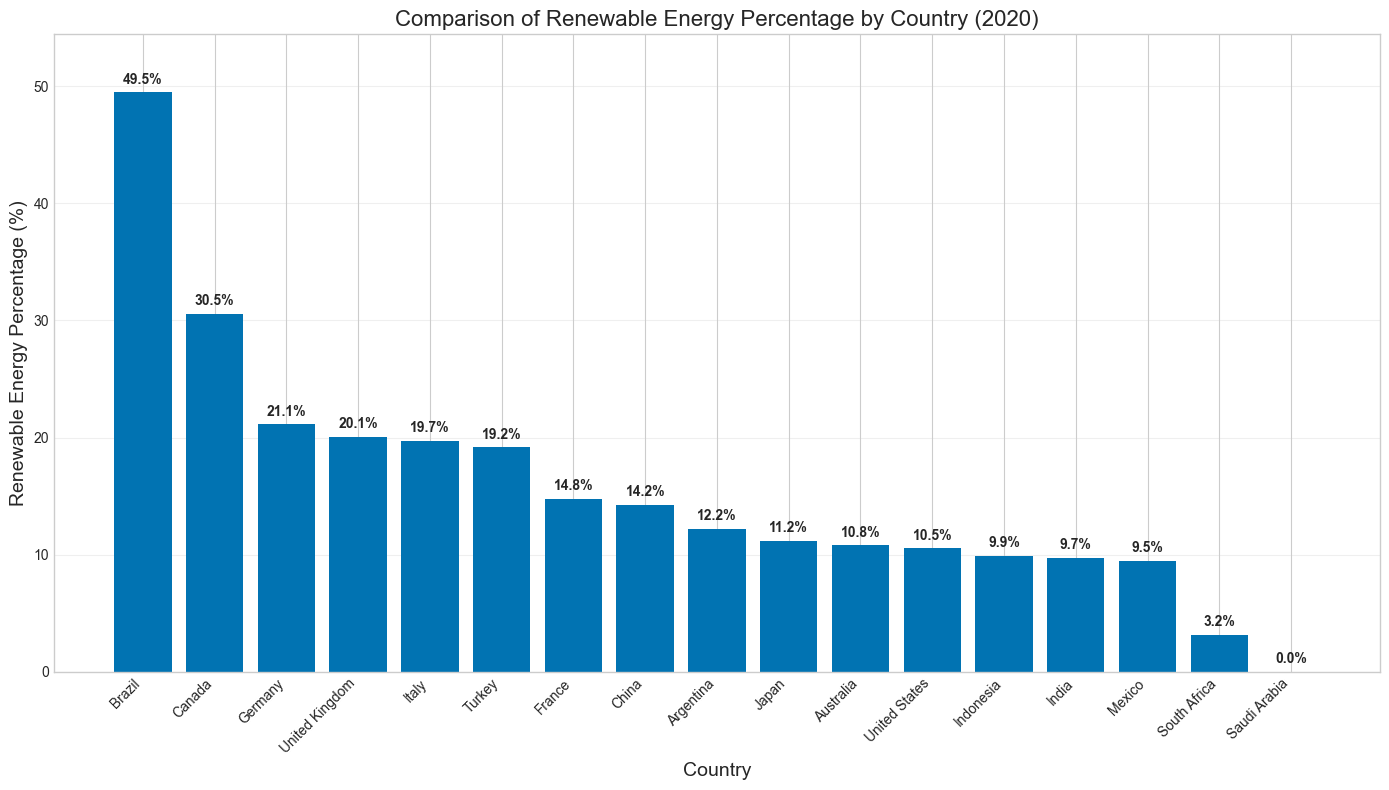

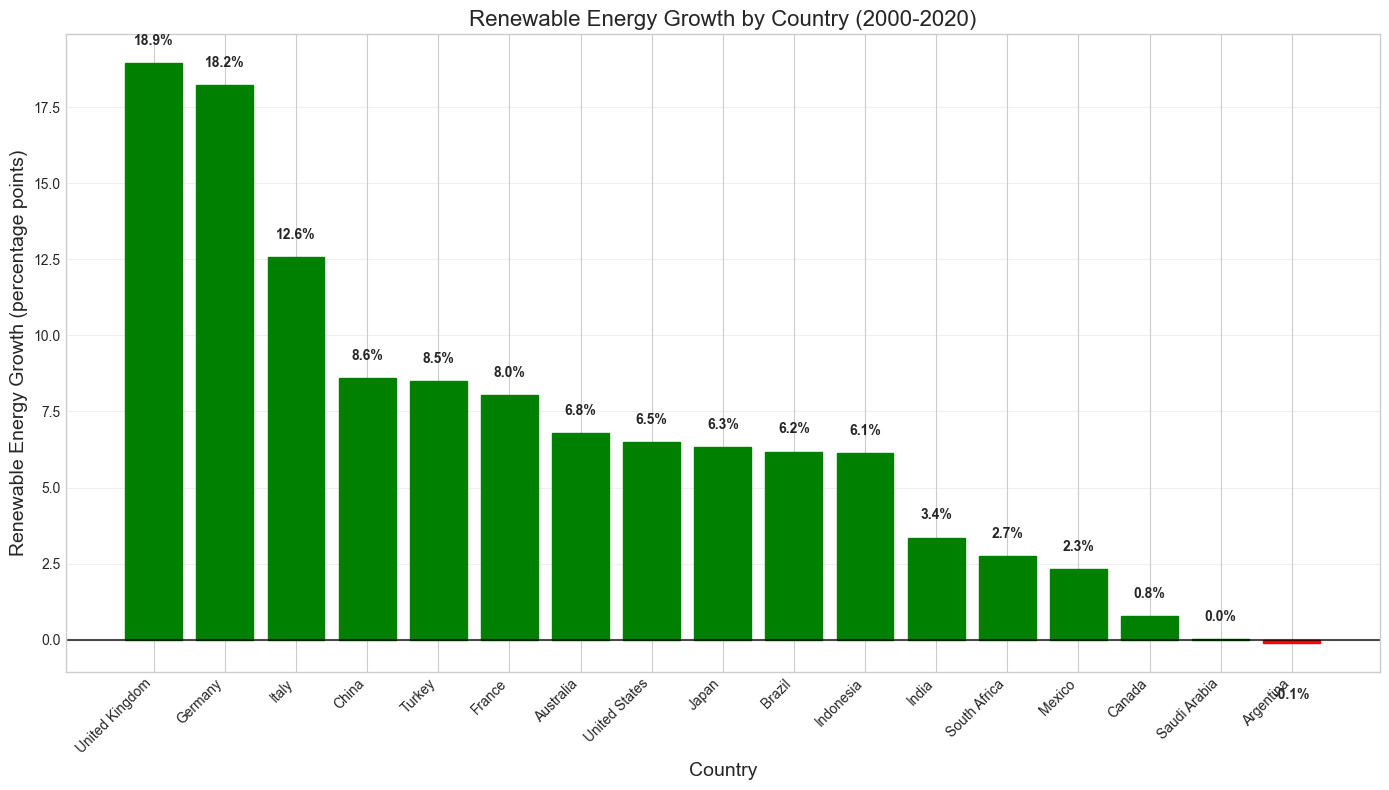

In [47]:
country_comparison()